# Building a simple linear regression model

### Build regression model that will use following datapoints to train model using gradient descent optimization

## Country, income, mortality
- Hungary,200,65.7
- Japan,239,46.7
- France,472,44.4
- Australia,885,22.9
- Switzerland,1045,28.5
- Finland,688,32.4
- Canada,993,33.7

### Complete 50 learning epochs using above datapoints

## Use following datapoints to measure model's prediction error as MSE. 
### Model predictions should be compared w.r.t. measured infant mortality values:
- Greece,134,47.4
- Austria,556,49.1
- Italy,295,55.7
- Denmark,906,27.1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

X = [200,239,472,885,1045,688,993]
Y = [65.7,46.7,44.4,22.9,28.5,32.4,33.7]

X_max = np.max(X)
Y_max = np.max(Y)

# normalize data
X = np.true_divide(X, X_max)
Y = np.true_divide(Y, Y_max)
plt.xlim(0, max(X))
plt.ylim(0, max(Y))

(0, 1.0)

 b0: -0.380886369098 b1: -0.0177946375927 Error: 4.51421896498
 b0: 0.774918560149 b1: 0.676621203597 Error: 3.55594581275
 b0: -0.0670734222394 b1: 0.0326768169891 Error: 1.80160676633
 b0: 0.656269277429 b1: 0.446797285707 Error: 1.60514323503
 b0: 0.145623305775 b1: 0.0356428206494 Error: 0.776225291716
 b0: 0.600732936051 b1: 0.278584383538 Error: 0.801359611139
 b0: 0.293474078038 b1: 0.0128816130855 Error: 0.38504933254
 b0: 0.581897530062 b1: 0.151769652821 Error: 0.453431187889
 b0: 0.399179637324 b1: -0.0226217700414 Error: 0.231400417926
 b0: 0.583746442257 b1: 0.0534452671699 Error: 0.29162778741
 b0: 0.477024079091 b1: -0.0632520680181 Error: 0.166644714048
 b0: 0.596643767692 b1: -0.0247320044661 Error: 0.209096612791
 b0: 0.536061024593 b1: -0.104657837145 Error: 0.135477554148
 b0: 0.614860561322 b1: -0.0882396024093 Error: 0.162478076925
 b0: 0.582085006461 b1: -0.144457876901 Error: 0.117482030638
 b0: 0.63505177455 b1: -0.140744043059 Error: 0.133509068176
 b0: 0.6188

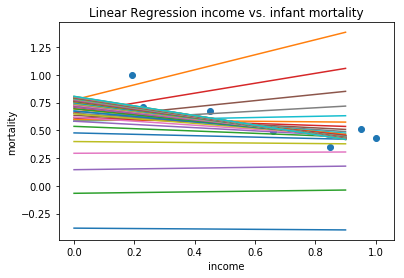

In [6]:
def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / 2

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

# init weights
b1 = 1.0
b0 = 1.0

learn = 0.5

plt.xlabel('income')
plt.ylabel('mortality')
plt.title('Linear Regression income vs. infant mortality')
plt.scatter(X, Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(X), 5)
sample_X = [X[i] for i in sorted(batchSample)]
sample_Y = [Y[i] for i in sorted(batchSample)]

for i in range(50):
    ERROR = mse(X, Y, calc_total_Error)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)

plt.show()

 b0: 1.77490477959 b1: 0.772481334423 Error: 17.264822331
 b0: -0.313908398621 b1: -0.698754310984 Error: 10.2365435676
 b0: 1.36627701875 b1: 0.35362363867 Error: 6.34802756829
 b0: 0.117923617912 b1: -0.545583334094 Error: 3.74008657263
 b0: 1.13776099692 b1: 0.0753376013592 Error: 2.36538978088
 b0: 0.394086370439 b1: -0.477641138446 Error: 1.38416513815
 b0: 1.01524427442 b1: -0.114700584923 Error: 0.905348895992
 b0: 0.574291061321 b1: -0.457638309956 Error: 0.528276821579
 b0: 0.954449248652 b1: -0.248491782153 Error: 0.365690423698
 b0: 0.69479437252 b1: -0.463594584135 Error: 0.216261870953
 b0: 0.929011493113 b1: -0.345733128952 Error: 0.163579172813
 b0: 0.777690660919 b1: -0.482680625618 Error: 0.101856014644
 b0: 0.923309688113 b1: -0.418655098069 Error: 0.0863933078094
 b0: 0.836511633316 b1: -0.507519923425 Error: 0.0595906293534
 b0: 0.92815499281 b1: -0.474941626553 Error: 0.0561714167557
 b0: 0.879602383388 b1: -0.533970367028 Error: 0.0439208974472
 b0: 0.938200955879

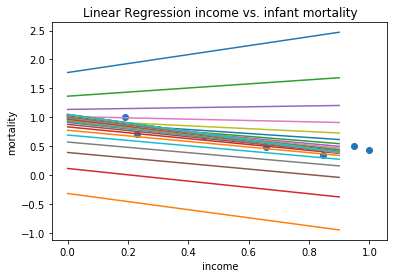

In [5]:
def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / 2

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

# init weights
b1 = -1.0
b0 = -1.0

learn = 0.5

plt.xlabel('income')
plt.ylabel('mortality')
plt.title('Linear Regression income vs. infant mortality')
plt.scatter(X, Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(X), 5)
sample_X = [X[i] for i in sorted(batchSample)]
sample_Y = [Y[i] for i in sorted(batchSample)]

for i in range(50):
    ERROR = mse(X, Y, calc_total_Error)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)

plt.show()

# Review Questions
1. What are the model’s parameter values and measured MSE for the test datapoints at the
end of the optimization process when the starting parameter values are b0 = 1 and b1 = 1:
- b0 = 0.806818587207
- b1 = -0.432368051148
- MSE = 0.0536500584582

2. Repeat the above optimization, but set the starting parameter values to b0 = -1 and b1
= -1. Again, report the final parameter values and the model’s MSE:
- b0 = 1.05207556604
- b1 = -0.734586394537
- MSE = 0.0452875222263

3. Is there a discrepancy in the reported MSE values in (1) and (2)? Why/Why Not.
There is a discrepancy in the reported MSE values in (1) and (2) because when using negative weights the regression fits the data better, since looking at the data graphed up, the data has a downward trend - a decreasing slope which negative weights for b0 and b1 model better.